# Gradient Descent 

Gradient descent is one of the method used to update parameters(weights) of neural network. It uses chain rule to find partial deriviatve of loss function with respect to hidden layer neurons, weights and biases.

# Chain Rule 

Chain rule lets you compute derivative of composite functions.

Neural Network Topology

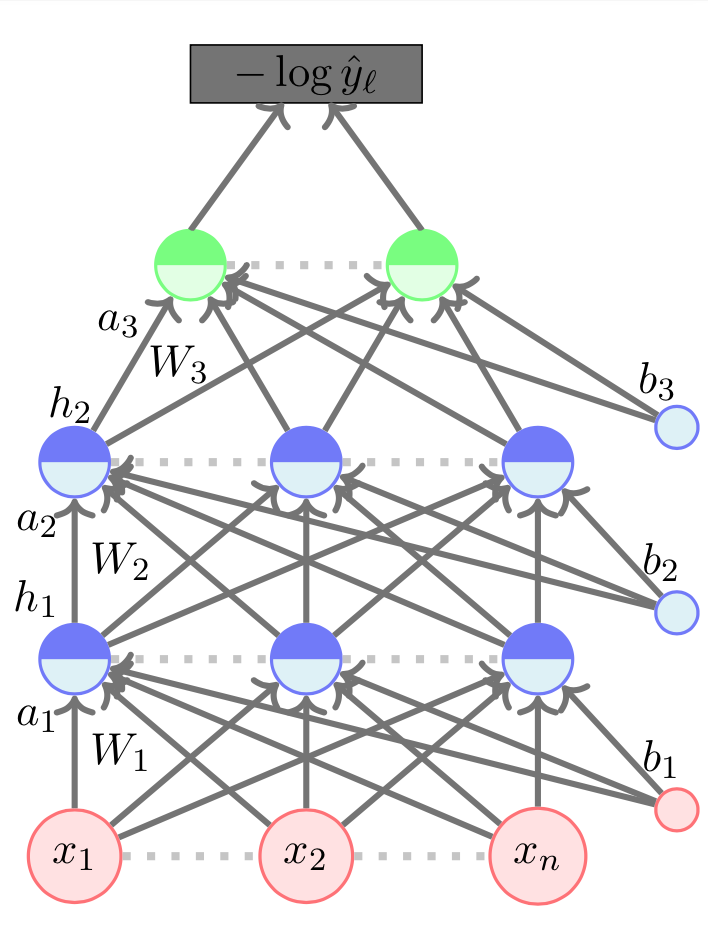.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pandas as pd
from sklearn import preprocessing
from scipy.special import softmax

In [2]:
# load dataset files
dataset_dir = "dataset"
files = os.listdir(dataset_dir)
files

['kmnist-train-labels.npz',
 'kmnist-test-imgs.npz',
 'kmnist-train-imgs.npz',
 'kmnist_classmap.csv',
 'kmnist-test-labels.npz']

In [3]:
# load all the training and testing files
train_labels, test_images, train_images, test_labels = [np.load(os.path.join(dataset_dir, x))['arr_0'] for x in files if x.split(".")[-1] == "npz"] 

In [4]:
# load class map
class_csv = pd.read_csv(os.path.join(dataset_dir, "kmnist_classmap.csv"))

index_to_class = class_csv.set_index("index").T.to_dict() 

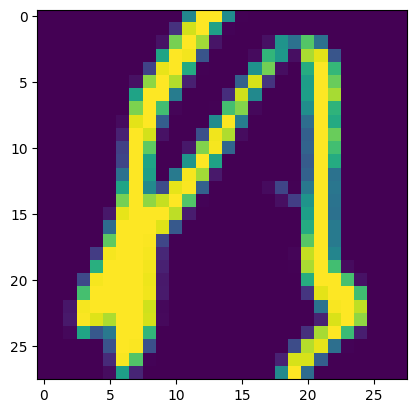

In [5]:
 plt.imshow(train_images[0])

In [6]:
train_images = train_images.reshape(len(train_images), 28 * 28) / 255
test_images = test_images.reshape(len(test_images), 28 * 28) / 255

train_labels = train_labels.reshape(-1, 1)

# one hot encode labels
one_hot_encode = np.zeros((len(train_labels), 10))

for i, l in enumerate(train_labels):
    one_hot_encode[i][l] = 1

train_labels = one_hot_encode

In [7]:
one_hot_encode = np.zeros((len(test_labels), 10))

for i, l in enumerate(test_labels):
    one_hot_encode[i][l] = 1

test_labels = one_hot_encode

# Backpropogation from Scratch

## Loss Function - CrossEntropy

## Output Layer Activation function - Softmax

## Hidden Layer Activation function - Sigmoid

## Derivative with respect to output

In [8]:
def cross_entropy(y_actual, y_pred):
    return -np.sum(y_actual * np.log2(y_pred))
 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def sigmoid_deriv(x):
     return sigmoid(x) - (1 - sigmoid(x)) 

def softmax(x):
    x = np.exp(x - x.max())
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

def softmax_deriv(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0) * (1 - np.exp(x) / np.sum(np.exp(x), axis=0)) 

def relu(x):
    return np.maximum(x, 0)

reluderiv = lambda x: x >= 0

In [9]:
def init_model(layers):
    
    model = {}
    
    for i in range(len(layers) - 1):
        model['w'+str(i+1)] = np.random.sample((layers[i], layers[i+1]))
        
    return model 

In [10]:
layers = [28 * 28, 128, 64, 10]

model = init_model(layers) 

In [11]:
def forward(x):
    
    nn_state = {} 
    
    nn_state['a1'] = np.dot(x, model['w1'])
    nn_state['h1'] = sigmoid(nn_state['a1'])
    
    nn_state['a2'] = np.dot(nn_state['h1'], model['w2'])
    nn_state['h2'] = sigmoid(nn_state['a2'])
    
    nn_state['a3'] = np.dot(nn_state['h2'], model['w3'])
    nn_state['h3'] = softmax(nn_state['a3'])
    
    return nn_state  

In [12]:
def backward(x, y):
    
    nn_state = forward(x)
    
    # gradient with respect to output layer
    nn_state['grad_a3'] = -(y - nn_state['h3'])
    
    
    # gradient with respect to post acitvation of hidden layer 2
    nn_state['grad_a2'] = np.dot(nn_state['grad_a3'], model['w3'].T) * sigmoid_deriv(nn_state['a2']) 
    
    # gradient with respect to  post activation of hidden layer 1
    nn_state['grad_a1'] = np.dot(nn_state['grad_a2'], model['w2'].T) * sigmoid_deriv(nn_state['a1']) 
    
    nn_state['grad_w3'] = np.outer(nn_state['h2'], nn_state['grad_a3']) 
    
    nn_state['grad_w2'] = np.outer(nn_state['h1'], nn_state['grad_a2']) 
    
    nn_state['grad_w1'] = np.outer(x, nn_state['grad_a1']) 
    
    return nn_state

In [14]:
epochs = 100
lr = 0.001

for i in range(epochs):
    
    print("Epoch: {}".format(i+1))
    
    loss, error, correct_cnt = 0.0, 0.0, 0
    for x, y in zip(train_images[:1000], train_labels[:1000]):
        
        nn_state = backward(x, y)
        
        loss = cross_entropy(y, nn_state['h3'])
        
        correct_cnt += int(np.argmax(nn_state['h3']) == np.argmax(y))
        
        error += np.sum((y - nn_state['h3']) ** 2)
        
        model['w3'] -= lr *  nn_state['grad_w3']
        model['w2'] -= lr * nn_state['grad_w2']
        model['w1'] -= lr * nn_state['grad_w1'] 
        
    print("Loss: ", loss)
    print("Error: ", error / 1000)
    print("Correct Count: ", correct_cnt / 1000)
        

Epoch: 1


/var/folders/l8/q7ld16h119gfyjh322_4cd1c0000gn/T/ipykernel_22279/318455146.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Loss:  3.438572175845744
Error:  0.875420014820075
Correct Count:  0.203
Epoch: 2
Loss:  3.452879846035208
Error:  0.8752801143773148
Correct Count:  0.207
Epoch: 3
Loss:  3.45645247221611
Error:  0.8755916570358641
Correct Count:  0.202
Epoch: 4
Loss:  3.4586184154117365
Error:  0.8756646298756711
Correct Count:  0.2
Epoch: 5
Loss:  3.4600893653548455
Error:  0.8757018264678326
Correct Count:  0.201
Epoch: 6
Loss:  3.4609800885639084
Error:  0.8757277845588467
Correct Count:  0.201
Epoch: 7
Loss:  3.4614768580882114
Error:  0.8757437779877454
Correct Count:  0.201
Epoch: 8
Loss:  3.4617278079020948
Error:  0.8757518934154258
Correct Count:  0.203
Epoch: 9
Loss:  3.4618435221983552
Error:  0.8757548968848077
Correct Count:  0.203
Epoch: 10
Loss:  3.4618981481972546
Error:  0.8757567395498458
Correct Count:  0.203
Epoch: 11
Loss:  3.461914596159831
Error:  0.8757569707056144
Correct Count:  0.203
Epoch: 12
Loss:  3.4619054690396895
Error:  0.8757559644811528
Correct Count:  0.203
Epoch:

KeyboardInterrupt: 